In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.stats.anova as anova
import statsmodels.stats.diagnostic as diag
import statsmodels.stats.outliers_influence as influence
import statsmodels.stats.stattools as stattools
import mpmath as mp

In [2]:
#pip install pingouin

In [3]:
import pingouin as pg

In [4]:
coff_salt = pd.read_csv('coffee_salt_six_reps.csv')

In [5]:
coff_salt.head()

,treatments,wdpt_2,vwc_1,wdpt_1,vwc_2,s_24,s_4,s_g,pk_mm,ph,EC,total_acidity,nitrogen,carbon,co2_emission
0,Control,10.0,28.3,4,25.8,39.758,36.480,30.358,3.9758,7.25,193.39,1.134,0.21291,1.092,5.952419
1,Cofee 100,25.0,36.0,3,19.8,51.390,48.665,42.688,5.1390,6.85,148.24,1.275,0.18557,1.385,6.752561
2,Cofee 200,22.0,33.8,2,18.6,50.052,47.669,42.825,5.0052,5.95,150.65,1.392,0.16881,1.992,5.241585
3,Sand 100,12.0,33.0,2,23.4,37.869,35.647,30.658,3.7869,6.24,162.04,0.860,0.15992,1.026,2.517326
4,Sand 200,9.0,28.6,6,26.2,35.648,33.567,28.654,3.5648,7.02,138.83,0.828,0.17689,1.317,7.130124


In [6]:
coff_salt.shape

(42, 15)

<AxesSubplot:xlabel='treatments', ylabel='wdpt_2'>

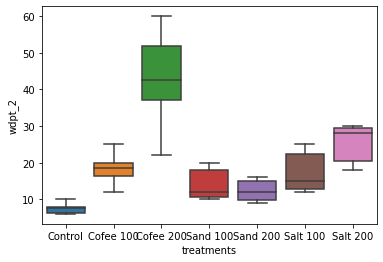

In [7]:
sns.boxplot(x='treatments', y='wdpt_2', data=coff_salt)


<AxesSubplot:xlabel='treatments', ylabel='vwc_1'>

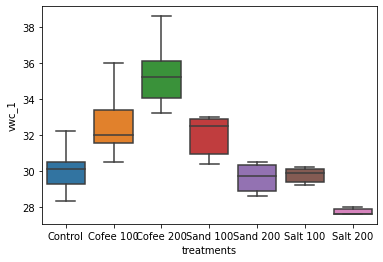

In [8]:
sns.boxplot(x='treatments', y='vwc_1', data=coff_salt )

<AxesSubplot:xlabel='treatments', ylabel='wdpt_1'>

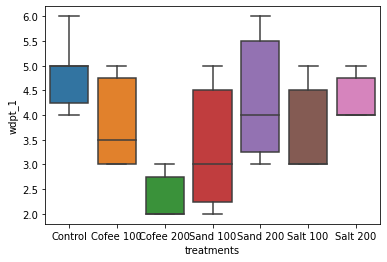

In [9]:
sns.boxplot(x='treatments', y='wdpt_1', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='vwc_2'>

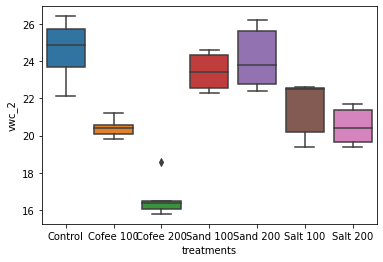

In [10]:
sns.boxplot(x='treatments', y='vwc_2', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='s_24'>

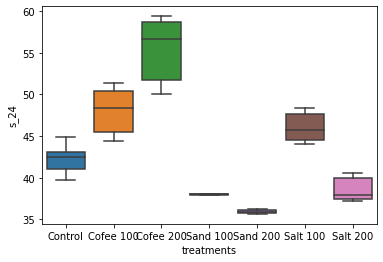

In [11]:
sns.boxplot(x='treatments', y='s_24', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='s_4'>

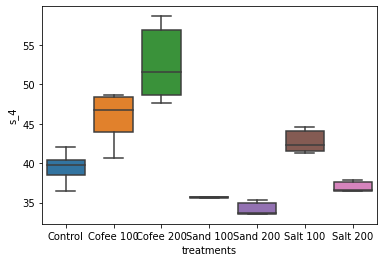

In [12]:
sns.boxplot(x='treatments', y='s_4', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='s_g'>

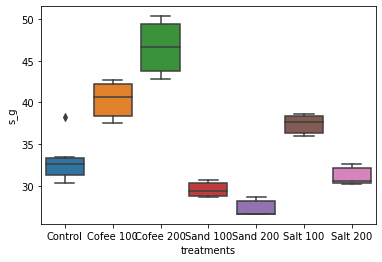

In [13]:
sns.boxplot(x='treatments', y='s_g', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='pk_mm'>

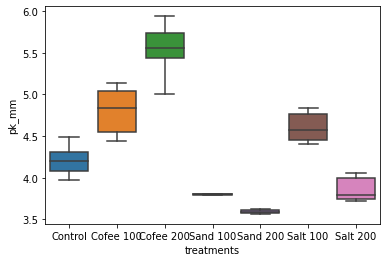

In [14]:
sns.boxplot(x='treatments', y='pk_mm', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='ph'>

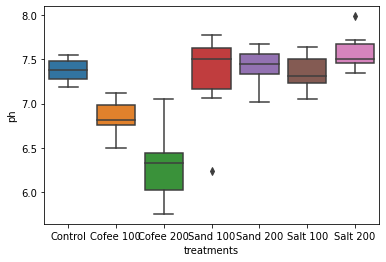

In [15]:
sns.boxplot(x='treatments', y='ph', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='EC'>

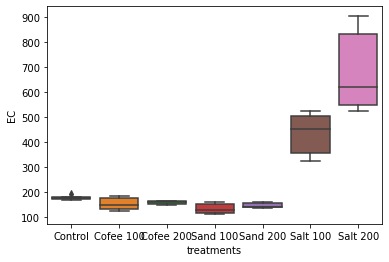

In [16]:
sns.boxplot(x='treatments', y='EC', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='total_acidity'>

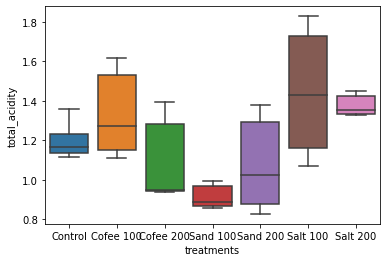

In [17]:
sns.boxplot(x='treatments', y='total_acidity', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='nitrogen'>

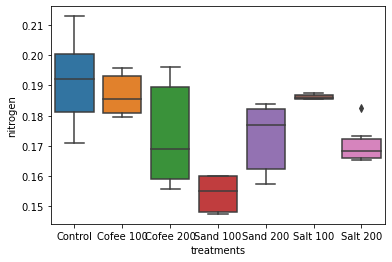

In [18]:
sns.boxplot(x='treatments', y='nitrogen', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='carbon'>

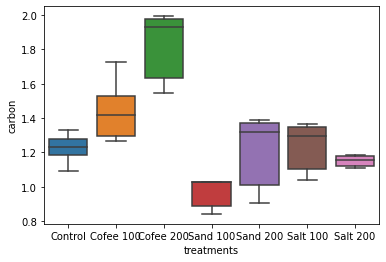

In [19]:
sns.boxplot(x='treatments', y='carbon', data=coff_salt)

<AxesSubplot:xlabel='treatments', ylabel='co2_emission'>

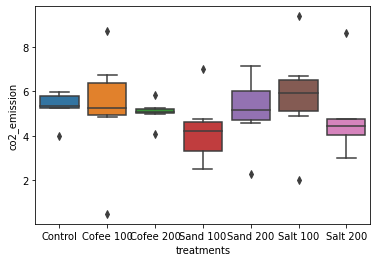

In [20]:
sns.boxplot(x='treatments', y='co2_emission', data=coff_salt)

In [21]:
coff_salt['treatments'].value_counts()

Control      6
Cofee 100    6
Cofee 200    6
Sand 100     6
Sand 200     6
Salt 100     6
Salt 200     6
Name: treatments, dtype: int64

In [22]:
coff_salt.describe()

,wdpt_2,vwc_1,wdpt_1,vwc_2,s_24,s_4,s_g,pk_mm,ph,EC,total_acidity,nitrogen,carbon,co2_emission
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,19.666667,31.016667,3.809524,21.595238,43.455129,41.080357,35.060495,4.343818,7.167619,269.766190,1.205476,0.176527,1.291405,5.088384
std,12.487392,2.644822,1.194256,2.858872,6.762339,6.523339,6.623190,0.671089,0.514231,209.002536,0.261069,0.015822,0.293003,1.732695
min,6.000000,27.600000,2.000000,15.800000,35.648000,33.567000,26.648000,3.564800,5.750000,113.410000,0.828000,0.147490,0.843000,0.469775
25%,12.000000,29.200000,3.000000,19.850000,37.955000,35.725000,30.256000,3.795500,7.022500,148.240000,0.996000,0.165190,1.096250,4.206289
50%,16.000000,30.450000,4.000000,22.200000,42.546000,39.778000,32.959000,4.199300,7.330000,166.330000,1.169000,0.179155,1.267000,5.077216
75%,25.000000,32.500000,5.000000,23.475000,47.958750,44.648000,38.566400,4.795875,7.520000,324.900000,1.380000,0.185730,1.387250,5.883623
max,60.000000,38.600000,6.000000,26.400000,59.398000,58.648000,50.325000,5.939800,7.990000,903.300000,1.828000,0.212910,1.992000,9.391143


<AxesSubplot:>

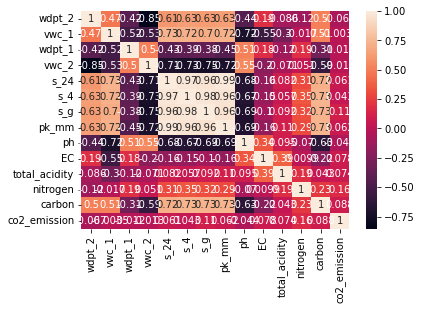

In [23]:
sns.heatmap(coff_salt.corr(), annot=True) # correlation matrix

In [24]:
# statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [25]:
#one way anova
mod = ols('wdpt_2 ~ C(treatments)', data=coff_salt).fit()


In [26]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq    df          F        PR(>F)
C(treatments)  4859.666667   6.0  18.483844  1.523351e-09
Residual       1533.666667  35.0        NaN           NaN


In [27]:
# pairwise t-test
pair_t = mod.t_test_pairwise('C(treatments)', method='b') # method='b' for bonferroni correction
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-b,reject-b
Cofee 200-Cofee 100,24.500000,3.821825,6.410549,2.231141e-07,16.741282,32.258718,4.685396e-06,True
Control-Cofee 100,-10.833333,3.821825,-2.834597,7.570155e-03,-18.592051,-3.074615,1.589732e-01,False
Salt 100-Cofee 100,-1.000000,3.821825,-0.261655,7.951211e-01,-8.758718,6.758718,1.000000e+00,False
Salt 200-Cofee 100,7.000000,3.821825,1.831586,7.553550e-02,-0.758718,14.758718,1.000000e+00,False
Sand 100-Cofee 100,-4.333333,3.821825,-1.133839,2.645690e-01,-12.092051,3.425385,1.000000e+00,False
Sand 200-Cofee 100,-6.000000,3.821825,-1.569930,1.254290e-01,-13.758718,1.758718,1.000000e+00,False
Control-Cofee 200,-35.333333,3.821825,-9.245146,6.342868e-11,-43.092051,-27.574615,1.332002e-09,True
Salt 100-Cofee 200,-25.500000,3.821825,-6.672204,1.016197e-07,-33.258718,-17.741282,2.134014e-06,True
Salt 200-Cofee 200,-17.500000,3.821825,-4.578964,5.682628e-05,-25.258718,-9.741282,1.193352e-03,True
Sand 100-Cofee 200,-28.833333,3.821825,-7.544388,7.684637e-09,-36.592051,-21.074615,1.613774e-07,True


In [28]:
# tukey hsd test

#first calculate ANOVA table
aov = pg.anova(data=coff_salt, dv='wdpt_2', between='treatments', detailed=True)
print(aov)

# Tukey HSD
pt = pg.pairwise_tukey(data=coff_salt, dv='wdpt_2', between='treatments')
print(pt)

       Source           SS  DF          MS          F         p-unc       np2
0  treatments  4859.666667   6  809.944444  18.483844  1.523351e-09  0.760115
1      Within  1533.666667  35   43.819048        NaN           NaN       NaN
            A          B    mean(A)    mean(B)       diff        se         T  \
0   Cofee 100  Cofee 200  18.333333  42.833333 -24.500000  3.821825 -6.410549   
1   Cofee 100    Control  18.333333   7.500000  10.833333  3.821825  2.834597   
2   Cofee 100   Salt 100  18.333333  17.333333   1.000000  3.821825  0.261655   
3   Cofee 100   Salt 200  18.333333  25.333333  -7.000000  3.821825 -1.831586   
4   Cofee 100   Sand 100  18.333333  14.000000   4.333333  3.821825  1.133839   
5   Cofee 100   Sand 200  18.333333  12.333333   6.000000  3.821825  1.569930   
6   Cofee 200    Control  42.833333   7.500000  35.333333  3.821825  9.245146   
7   Cofee 200   Salt 100  42.833333  17.333333  25.500000  3.821825  6.672204   
8   Cofee 200   Salt 200  42.833333  

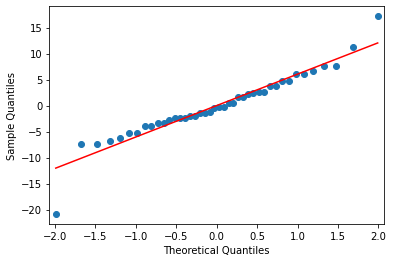

In [29]:
# qqnorm plot
res = mod.resid # residuals
fig = sm.qqplot(res, line='s')
plt.show()

In [30]:
# coorelation 
# pearson correlation
np.cov(coff_salt['wdpt_2'], coff_salt['vwc_2']) #covariance


array([[155.93495935, -30.42845528],
       [-30.42845528,   8.1731475 ]])

In [31]:
# coorelation instead of covariance
coff_salt.columns

Index(['treatments', 'wdpt_2', 'vwc_1', 'wdpt_1', 'vwc_2', 's_24', 's_4',
       's_g', 'pk_mm', 'ph', 'EC', 'total_acidity', 'nitrogen', 'carbon',
       'co2_emission'],
      dtype='object')

In [32]:
coff_salt.corr()

,wdpt_2,vwc_1,wdpt_1,vwc_2,s_24,s_4,s_g,pk_mm,ph,EC,total_acidity,nitrogen,carbon,co2_emission
wdpt_2,1.000000,0.465055,-0.416504,-0.852341,0.605341,0.633049,0.630384,0.631677,-0.443385,0.187483,-0.085860,-0.115958,0.501911,-0.066849
vwc_1,0.465055,1.000000,-0.523285,-0.527651,0.731060,0.724409,0.699954,0.718044,-0.720389,-0.548932,-0.302342,-0.017252,0.509018,-0.003499
wdpt_1,-0.416504,-0.523285,1.000000,0.501216,-0.430474,-0.392550,-0.377099,-0.447937,0.514354,0.176212,-0.124554,0.192600,-0.306401,-0.011898
vwc_2,-0.852341,-0.527651,0.501216,1.000000,-0.710904,-0.732264,-0.746234,-0.721808,0.545758,-0.195008,-0.071286,0.050765,-0.588054,-0.012794
s_24,0.605341,0.731060,-0.430474,-0.710904,1.000000,0.971600,0.960073,0.990412,-0.678316,-0.161043,0.082430,0.305184,0.716407,0.061240
s_4,0.633049,0.724409,-0.392550,-0.732264,0.971600,1.000000,0.976376,0.963660,-0.667501,-0.145498,0.057298,0.347370,0.734830,0.043107
s_g,0.630384,0.699954,-0.377099,-0.746234,0.960073,0.976376,1.000000,0.955724,-0.694638,-0.100689,0.092051,0.315578,0.729842,0.109013
pk_mm,0.631677,0.718044,-0.447937,-0.721808,0.990412,0.963660,0.955724,1.000000,-0.693846,-0.162447,0.108499,0.291740,0.733440,0.061971
ph,-0.443385,-0.720389,0.514354,0.545758,-0.678316,-0.667501,-0.694638,-0.693846,1.000000,0.342617,0.094926,-0.070456,-0.628055,-0.044002
EC,0.187483,-0.548932,0.176212,-0.195008,-0.161043,-0.145498,-0.100689,-0.162447,0.342617,1.000000,0.389205,0.009872,-0.223542,0.078052


In [33]:
coff_salt.corr(method='pearson') # for normal data

,wdpt_2,vwc_1,wdpt_1,vwc_2,s_24,s_4,s_g,pk_mm,ph,EC,total_acidity,nitrogen,carbon,co2_emission
wdpt_2,1.000000,0.465055,-0.416504,-0.852341,0.605341,0.633049,0.630384,0.631677,-0.443385,0.187483,-0.085860,-0.115958,0.501911,-0.066849
vwc_1,0.465055,1.000000,-0.523285,-0.527651,0.731060,0.724409,0.699954,0.718044,-0.720389,-0.548932,-0.302342,-0.017252,0.509018,-0.003499
wdpt_1,-0.416504,-0.523285,1.000000,0.501216,-0.430474,-0.392550,-0.377099,-0.447937,0.514354,0.176212,-0.124554,0.192600,-0.306401,-0.011898
vwc_2,-0.852341,-0.527651,0.501216,1.000000,-0.710904,-0.732264,-0.746234,-0.721808,0.545758,-0.195008,-0.071286,0.050765,-0.588054,-0.012794
s_24,0.605341,0.731060,-0.430474,-0.710904,1.000000,0.971600,0.960073,0.990412,-0.678316,-0.161043,0.082430,0.305184,0.716407,0.061240
s_4,0.633049,0.724409,-0.392550,-0.732264,0.971600,1.000000,0.976376,0.963660,-0.667501,-0.145498,0.057298,0.347370,0.734830,0.043107
s_g,0.630384,0.699954,-0.377099,-0.746234,0.960073,0.976376,1.000000,0.955724,-0.694638,-0.100689,0.092051,0.315578,0.729842,0.109013
pk_mm,0.631677,0.718044,-0.447937,-0.721808,0.990412,0.963660,0.955724,1.000000,-0.693846,-0.162447,0.108499,0.291740,0.733440,0.061971
ph,-0.443385,-0.720389,0.514354,0.545758,-0.678316,-0.667501,-0.694638,-0.693846,1.000000,0.342617,0.094926,-0.070456,-0.628055,-0.044002
EC,0.187483,-0.548932,0.176212,-0.195008,-0.161043,-0.145498,-0.100689,-0.162447,0.342617,1.000000,0.389205,0.009872,-0.223542,0.078052


In [34]:
coff_salt.corr(method='spearman') # for non-gaussian data

,wdpt_2,vwc_1,wdpt_1,vwc_2,s_24,s_4,s_g,pk_mm,ph,EC,total_acidity,nitrogen,carbon,co2_emission
wdpt_2,1.000000,0.181552,-0.374839,-0.859134,0.416078,0.478401,0.435088,0.433112,-0.270835,0.231337,0.017413,-0.159688,0.221536,-0.180518
vwc_1,0.181552,1.000000,-0.499441,-0.350136,0.586153,0.494376,0.535781,0.576824,-0.605969,-0.550402,-0.303306,0.010968,0.431414,0.018832
wdpt_1,-0.374839,-0.499441,1.000000,0.411133,-0.392257,-0.312802,-0.319950,-0.404335,0.421402,0.238478,-0.084902,0.181558,-0.234215,0.020563
vwc_2,-0.859134,-0.350136,0.411133,1.000000,-0.589954,-0.654711,-0.637828,-0.604974,0.398199,-0.182202,-0.121170,0.016723,-0.436240,0.056042
s_24,0.416078,0.586153,-0.392257,-0.589954,1.000000,0.971118,0.932776,0.996147,-0.618851,0.103371,0.202523,0.406363,0.622561,0.129166
s_4,0.478401,0.494376,-0.312802,-0.654711,0.971118,1.000000,0.960039,0.967755,-0.568074,0.230273,0.256400,0.435093,0.677889,0.113760
s_g,0.435088,0.535781,-0.319950,-0.637828,0.932776,0.960039,1.000000,0.930878,-0.636935,0.216911,0.177311,0.428247,0.677728,0.177999
pk_mm,0.433112,0.576824,-0.404335,-0.604974,0.996147,0.967755,0.930878,1.000000,-0.620722,0.103521,0.212072,0.386026,0.620376,0.126637
ph,-0.270835,-0.605969,0.421402,0.398199,-0.618851,-0.568074,-0.636935,-0.620722,1.000000,0.189057,-0.012290,-0.169385,-0.466137,-0.155567
EC,0.231337,-0.550402,0.238478,-0.182202,0.103371,0.230273,0.216911,0.103521,0.189057,1.000000,0.391869,0.343831,-0.020365,-0.000568


<AxesSubplot:xlabel='vwc_1', ylabel='wdpt_1'>

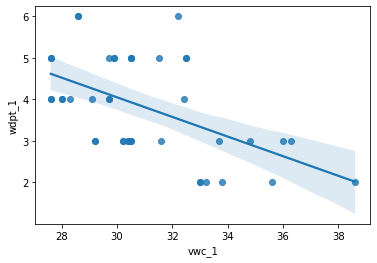

In [35]:
sns.regplot(x='vwc_1', y='wdpt_1', data=coff_salt)

<AxesSubplot:xlabel='s_g', ylabel='s_4'>

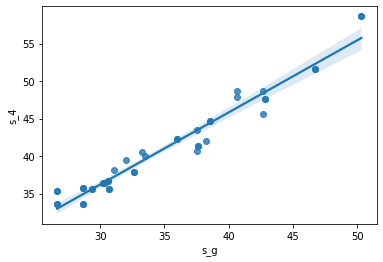

In [36]:
sns.regplot(x='s_g', y='s_4', data=coff_salt)

<AxesSubplot:xlabel='s_g', ylabel='s_24'>

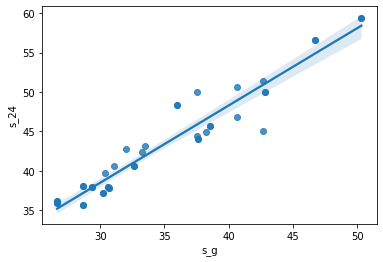

In [37]:
sns.regplot(x='s_g', y='s_24', data=coff_salt)

<AxesSubplot:xlabel='s_g', ylabel='pk_mm'>

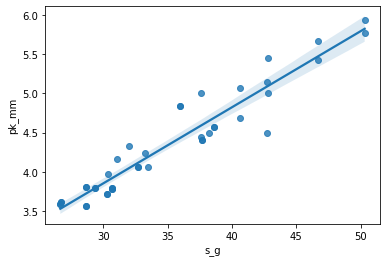

In [38]:
sns.regplot(x='s_g', y='pk_mm', data=coff_salt)

<AxesSubplot:xlabel='carbon', ylabel='wdpt_1'>

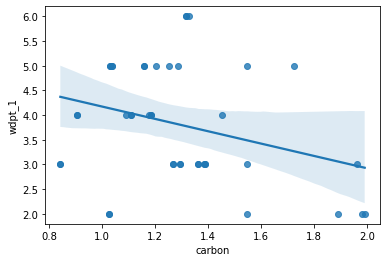

In [39]:
sns.regplot(x='carbon', y='wdpt_1', data=coff_salt)

<AxesSubplot:xlabel='carbon', ylabel='wdpt_2'>

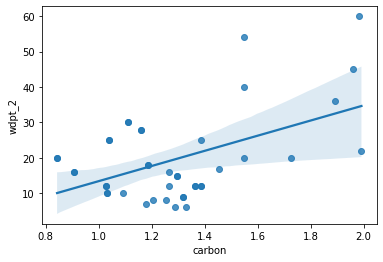

In [40]:
sns.regplot(x='carbon', y='wdpt_2', data=coff_salt)

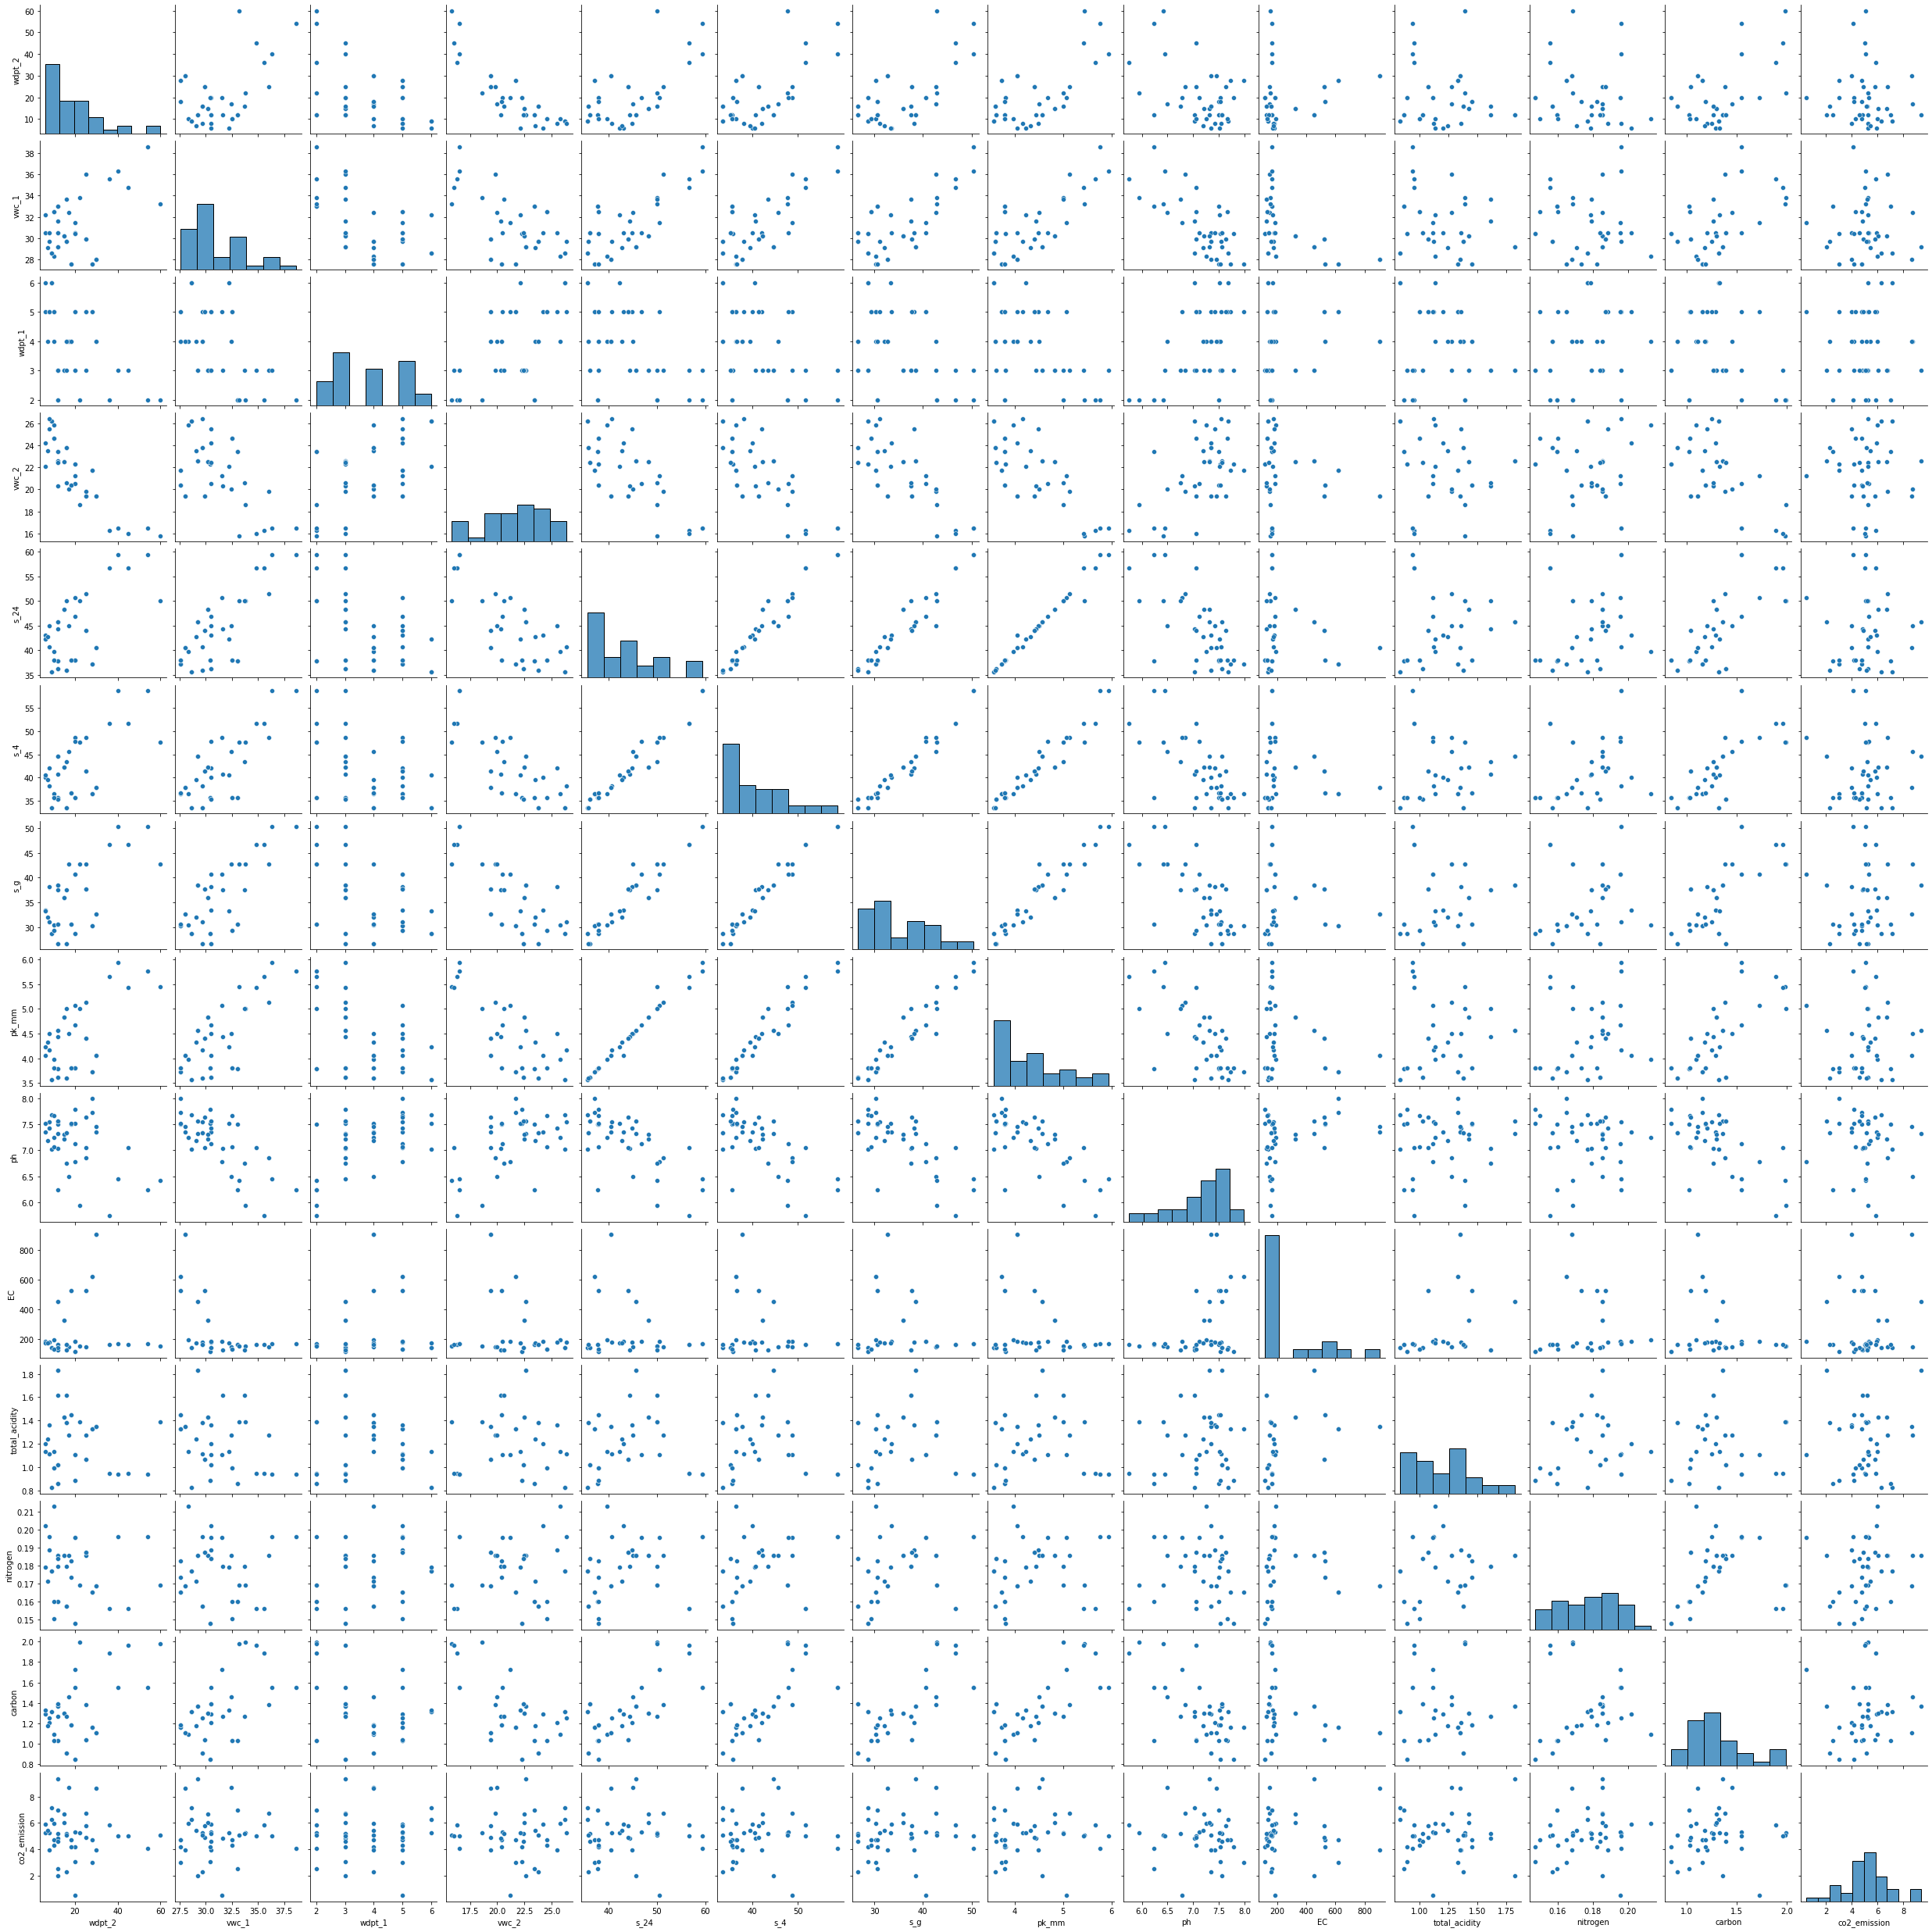

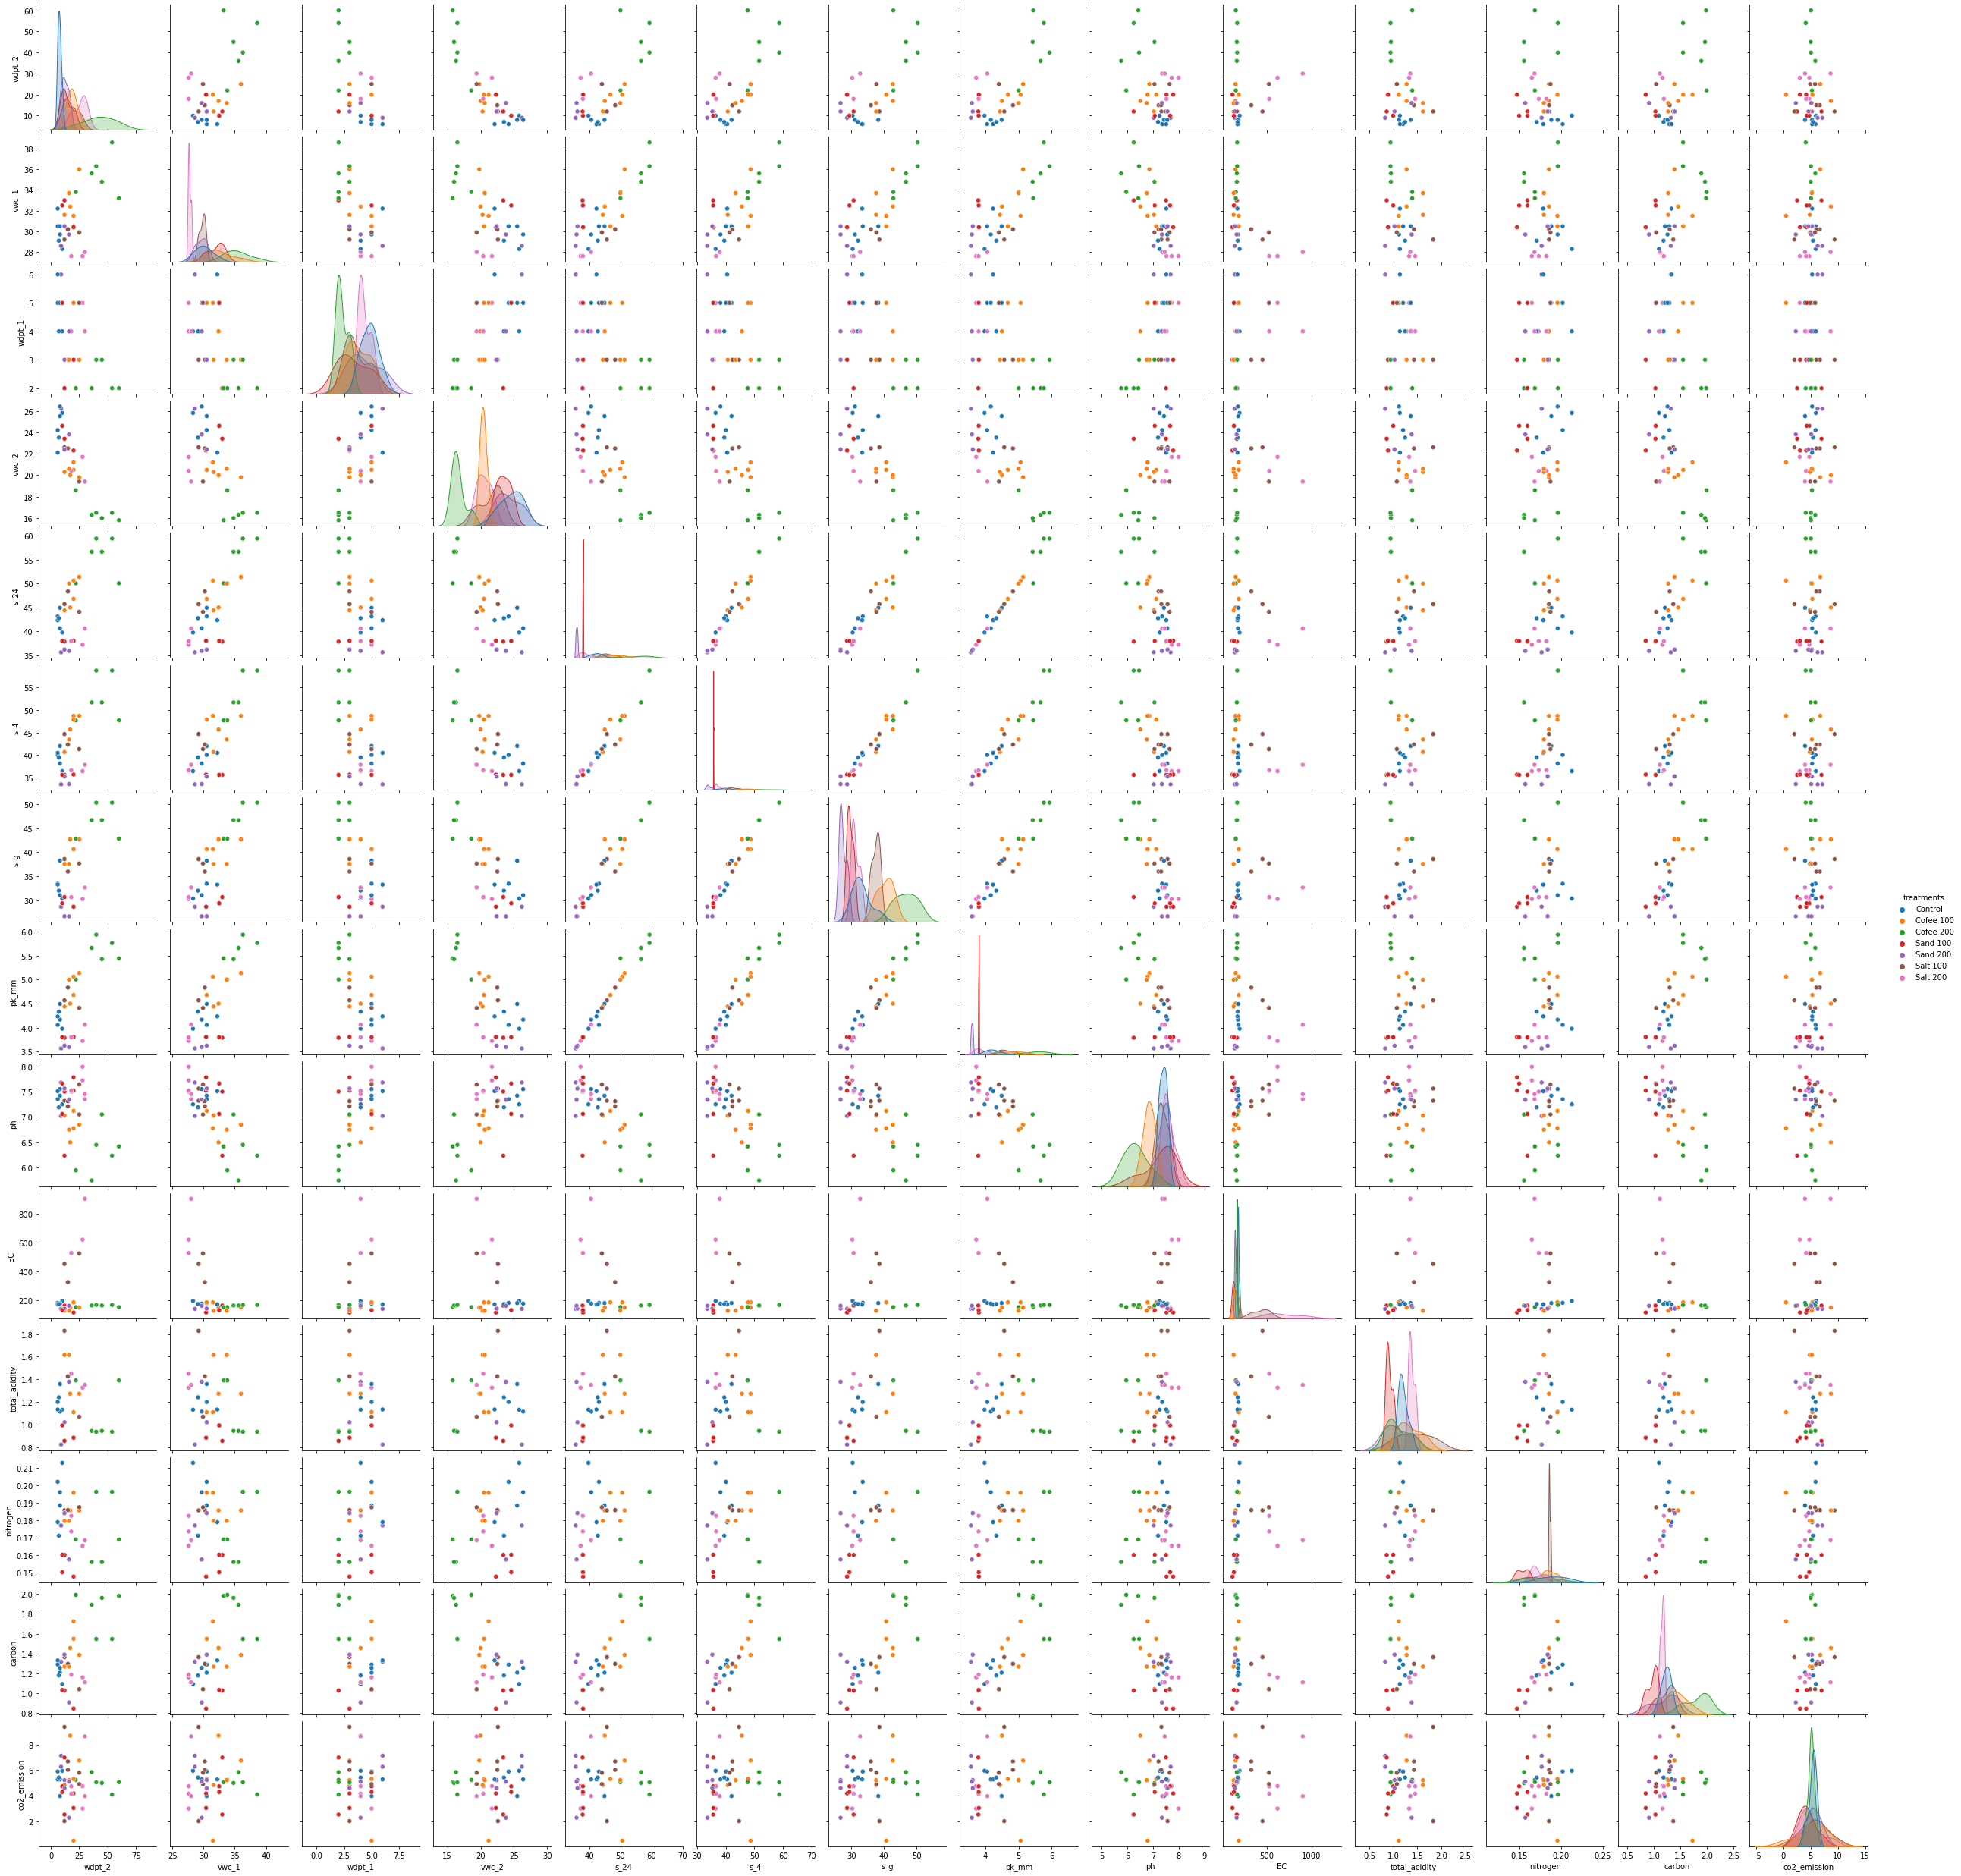

In [41]:
sns.pairplot(coff_salt) # pairplot
sns.pairplot(coff_salt, hue='treatments')

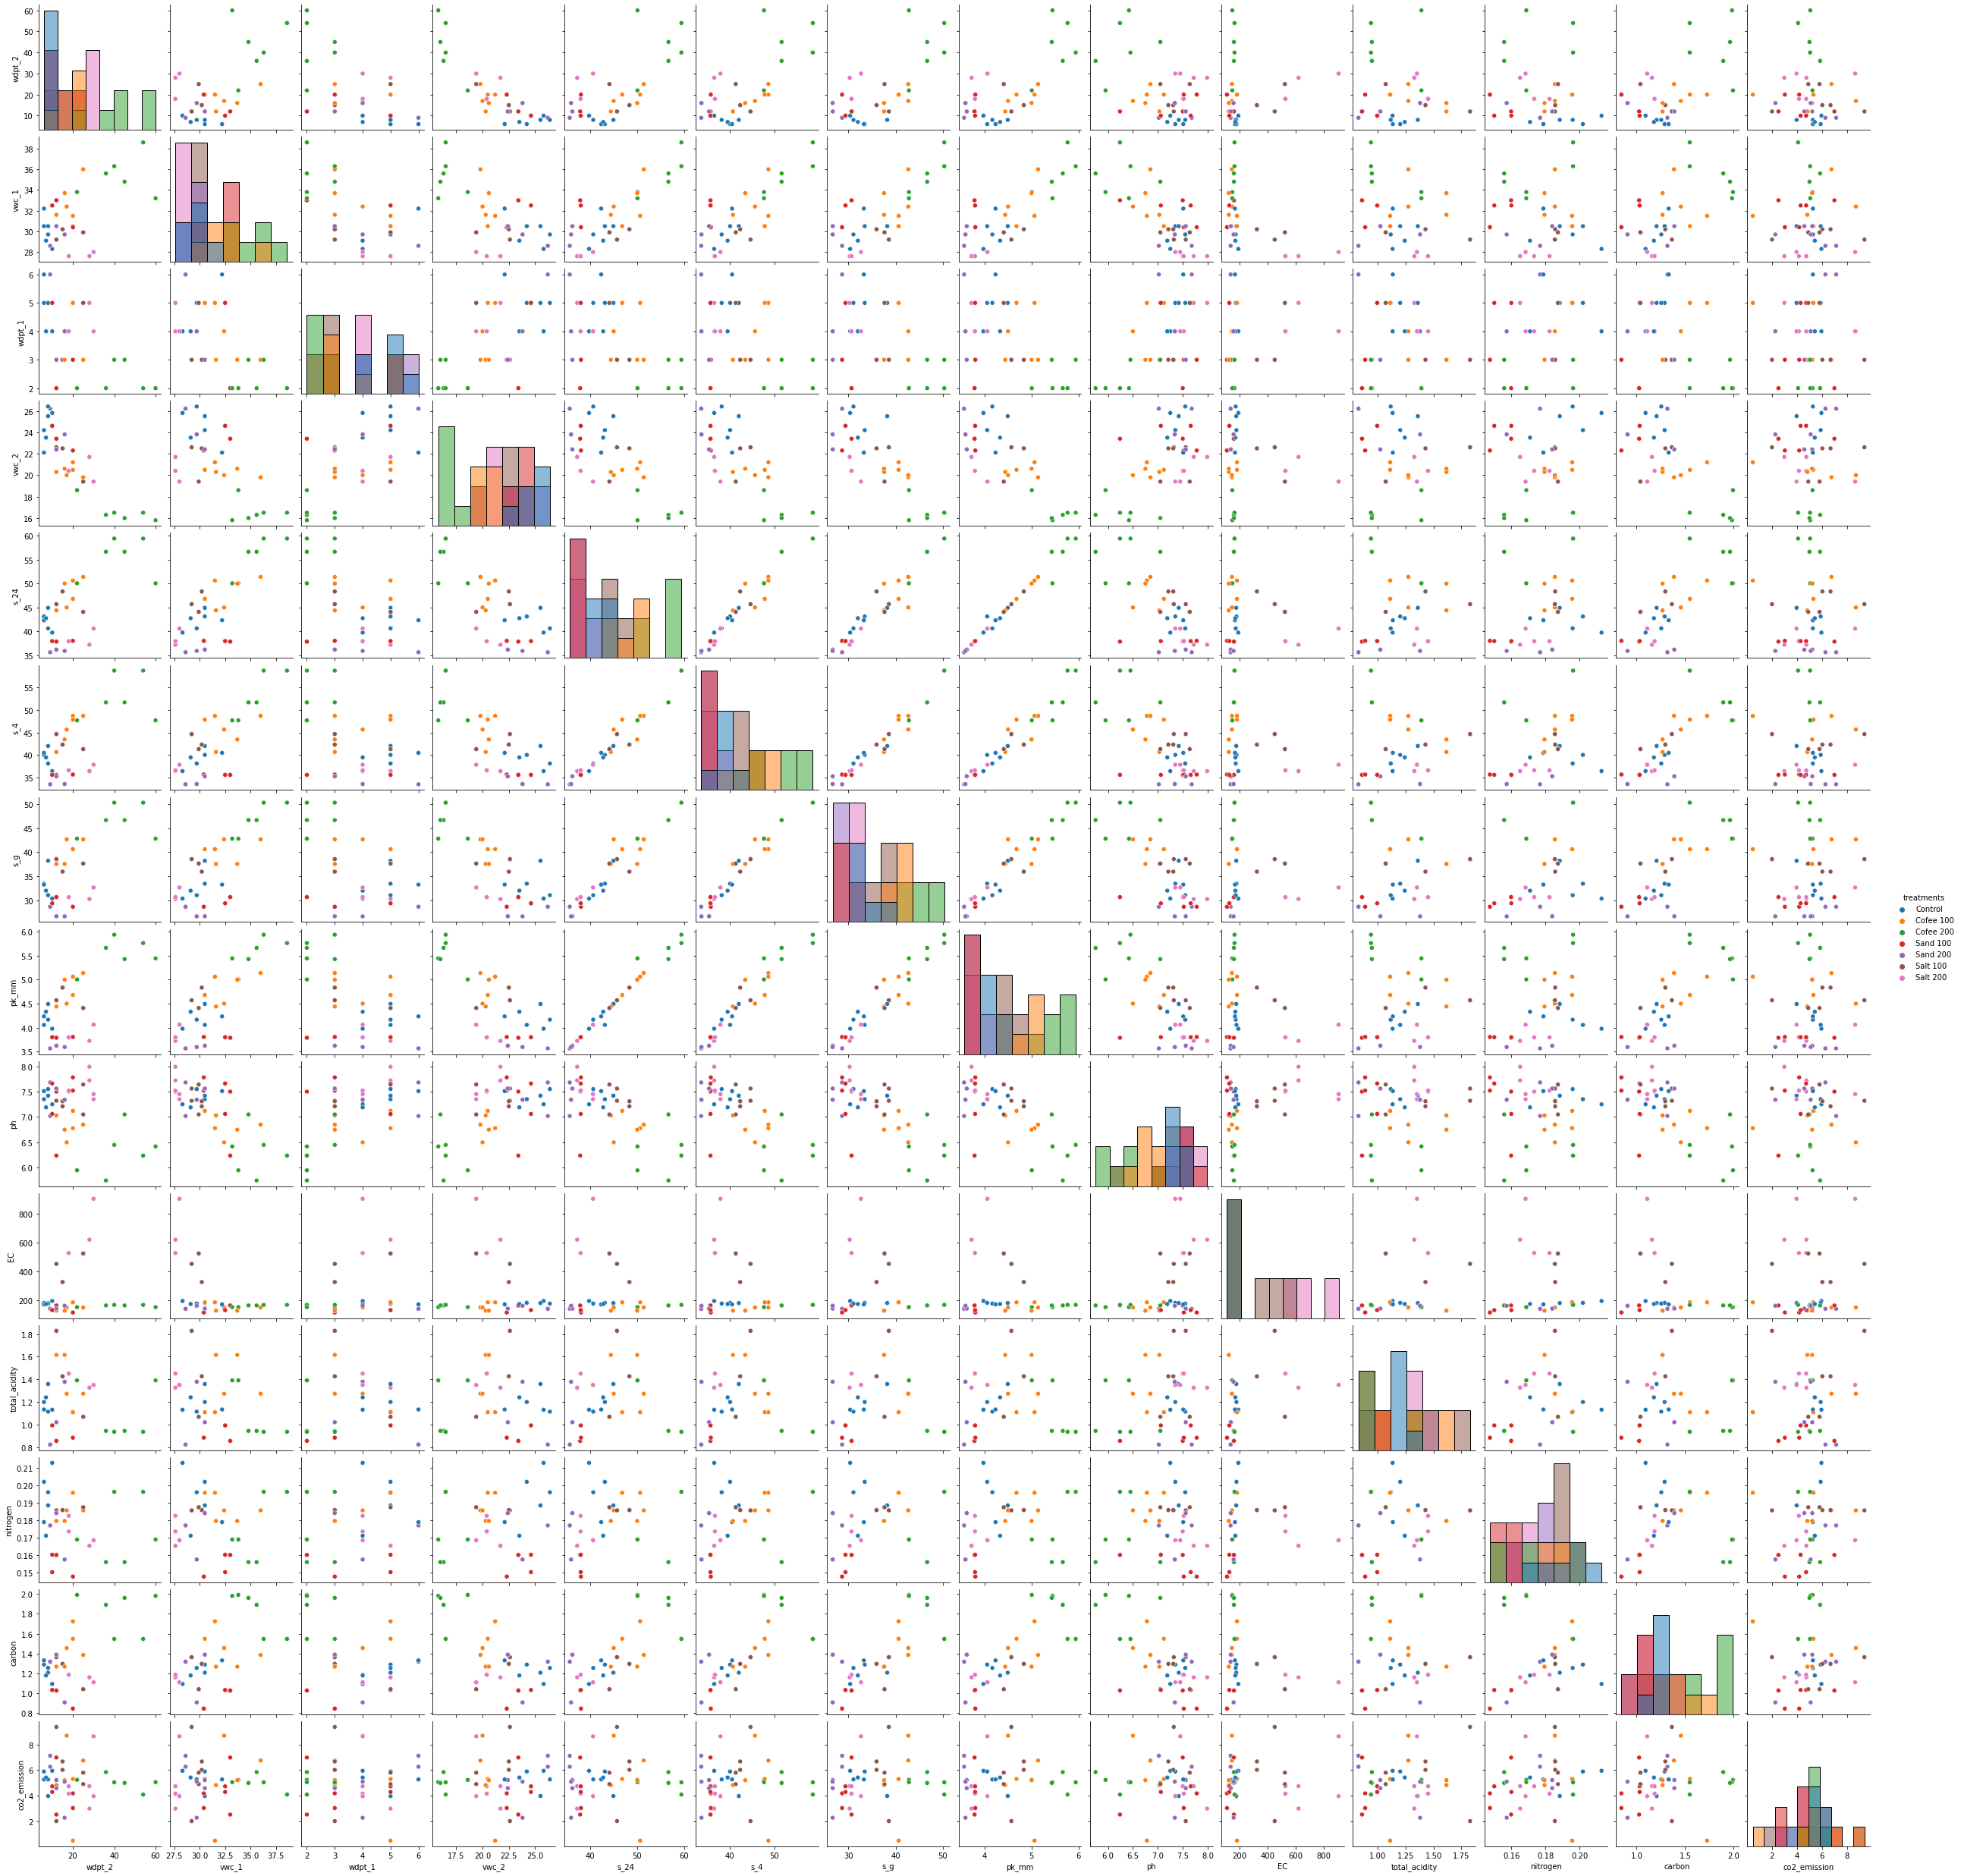

In [42]:
sns.pairplot(coff_salt, hue='treatments', diag_kind='hist')

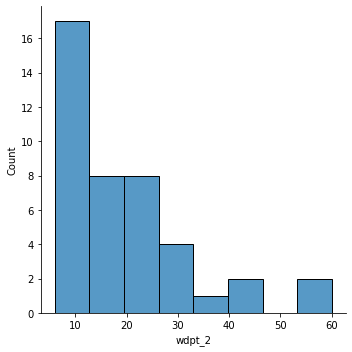

In [43]:
sns.displot(coff_salt['wdpt_2'])

array([[<AxesSubplot:title={'center':'wdpt_2'}>,
        <AxesSubplot:title={'center':'vwc_1'}>,
        <AxesSubplot:title={'center':'wdpt_1'}>,
        <AxesSubplot:title={'center':'vwc_2'}>],
       [<AxesSubplot:title={'center':'s_24'}>,
        <AxesSubplot:title={'center':'s_4'}>,
        <AxesSubplot:title={'center':'s_g'}>,
        <AxesSubplot:title={'center':'pk_mm'}>],
       [<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'EC'}>,
        <AxesSubplot:title={'center':'total_acidity'}>,
        <AxesSubplot:title={'center':'nitrogen'}>],
       [<AxesSubplot:title={'center':'carbon'}>,
        <AxesSubplot:title={'center':'co2_emission'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

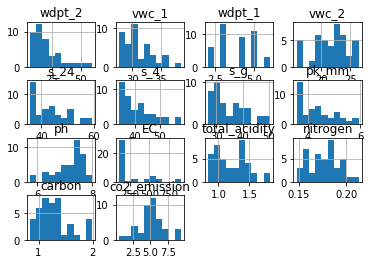

In [44]:
coff_salt.hist()

<AxesSubplot:>

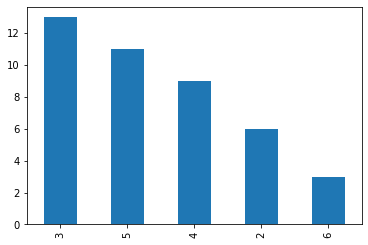

In [45]:
pd.value_counts(coff_salt['wdpt_1']).plot.bar()

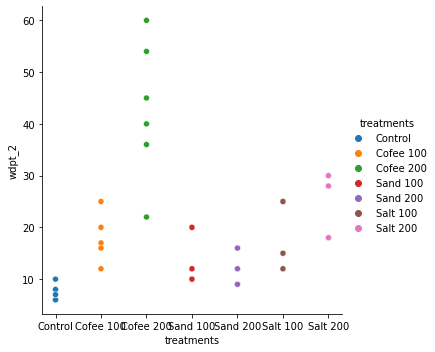

In [46]:
sns.relplot(x='treatments', y='wdpt_2', hue='treatments', data=coff_salt)

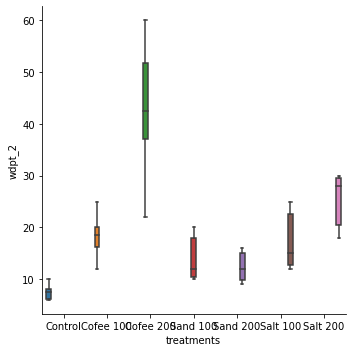

In [47]:
sns.catplot(x='treatments', y='wdpt_2', hue='treatments', data=coff_salt, kind='box')

# ###############################################################################################################



In [48]:
coff_salt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   treatments     42 non-null     object 
 1   wdpt_2         42 non-null     float64
 2   vwc_1          42 non-null     float64
 3   wdpt_1         42 non-null     int64  
 4   vwc_2          42 non-null     float64
 5   s_24           42 non-null     float64
 6   s_4            42 non-null     float64
 7   s_g            42 non-null     float64
 8   pk_mm          42 non-null     float64
 9   ph             42 non-null     float64
 10  EC             42 non-null     float64
 11  total_acidity  42 non-null     float64
 12  nitrogen       42 non-null     float64
 13  carbon         42 non-null     float64
 14  co2_emission   42 non-null     float64
dtypes: float64(13), int64(1), object(1)
memory usage: 5.0+ KB


In [70]:
X=coff_salt['treatments']  #data
y=coff_salt.drop(['treatments'],axis=1)

In [71]:
y.head()

,wdpt_2,vwc_1,wdpt_1,vwc_2,s_24,s_4,s_g,pk_mm,ph,EC,total_acidity,nitrogen,carbon,co2_emission
0,10.0,28.3,4,25.8,39.758,36.480,30.358,3.9758,7.25,193.39,1.134,0.21291,1.092,5.952419
1,25.0,36.0,3,19.8,51.390,48.665,42.688,5.1390,6.85,148.24,1.275,0.18557,1.385,6.752561
2,22.0,33.8,2,18.6,50.052,47.669,42.825,5.0052,5.95,150.65,1.392,0.16881,1.992,5.241585
3,12.0,33.0,2,23.4,37.869,35.647,30.658,3.7869,6.24,162.04,0.860,0.15992,1.026,2.517326
4,9.0,28.6,6,26.2,35.648,33.567,28.654,3.5648,7.02,138.83,0.828,0.17689,1.317,7.130124


In [137]:
#our machine learning algorithm does not understand aplhabets so we have to convert our data into integer/numbers


In [90]:
#standard scaler is used to transform our numbers to between 0 & 1 so the machine learning model does well
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)
y_scaled

array([[-0.78349768, -1.03961536,  0.16142686,  1.48860494, -0.55335056,
        -0.71376344, -0.71861106, -0.55503639,  0.16214424, -0.36986152,
        -0.27710093,  2.32744115, -0.68880432,  0.50471003],
       [ 0.43227458,  1.9070245 , -0.68606417, -0.63556519,  1.18761506,
         1.17678706,  1.16559592,  1.19927725, -0.6251457 , -0.5885062 ,
         0.26953189,  0.57847897,  0.32330624,  0.97209831],
       [ 0.18912013,  1.06512739, -1.53355519, -1.06039922,  0.98735612,
         1.02225376,  1.18653155,  0.99748292, -2.39654808, -0.57683547,
         0.72312082, -0.49367194,  2.42006771,  0.08948942],
       [-0.62139471,  0.75898299, -1.53355519,  0.63893689, -0.83607787,
        -0.84300665, -0.67276661, -0.83993137, -1.82576287, -0.52167793,
        -1.33935195, -1.06237252, -0.91678827, -1.50183617],
       [-0.86454916, -0.92481121,  1.85640892,  1.63021629, -1.16849574,
        -1.1657268 , -0.97900754, -1.1748979 , -0.29054748, -0.63407534,
        -1.46341046,  0.02

In [138]:
#label encoding is used to convert english names to numbers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X_encoded=le.fit_transform(coff_salt[['treatments']])

/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
#after using label encoding the data was tranformed into 1D array this line convert X into 2D array 
X_encoded_reshaped=X_encoded.reshape(-1, 1)
X_encoded_reshaped

array([[2],
       [0],
       [1],
       [5],
       [6],
       [3],
       [4],
       [2],
       [0],
       [1],
       [5],
       [6],
       [3],
       [4],
       [2],
       [0],
       [1],
       [5],
       [6],
       [3],
       [4],
       [2],
       [0],
       [1],
       [5],
       [6],
       [3],
       [4],
       [2],
       [0],
       [1],
       [5],
       [6],
       [3],
       [4],
       [2],
       [0],
       [1],
       [5],
       [6],
       [3],
       [4]])

In [119]:
#checks dimensions of X 
X_encoded_reshaped.ndim

2

In [155]:
#shape of y before applying PCA
y_scaled.shape

(42, 14)

In [156]:
from sklearn.decomposition import PCA

pca = PCA(0.95) 
y_pca = pca.fit_transform(y_scaled)

#the values in round brackets indicate how much features you want i have selected 95% of now you
#can also write how much columns do you want
#if you want to select two columns instead of percentage write  n_components=2 in round brackets

In [157]:
#shape of y after applying PCA
y_pca.shape  
#it has dropped 6 columns with less effect on data and selected those column which has more effect of the result

(42, 8)

In [133]:
#Ratio of how much usefull information each column has
pca.explained_variance_ratio_

array([0.50666549, 0.13176575, 0.1097629 , 0.06991803, 0.06463363,
       0.03389826, 0.02792647, 0.02295017])

In [162]:
#X_train, X_test, y_train, y_test = train_test_split(X_encoded_reshaped, y_pca, test_size=0.2, random_state=30)
